In [69]:
import pandas as pd
import numpy as np

In [70]:
df = pd.read_csv("House_Rent_Dataset.csv")
df.drop("Area Locality", axis='columns', inplace = True)
df.drop("Floor", axis='columns', inplace = True)
df

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [71]:
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd
# 
# # Create a sample DataFrame
# data = {'Category': ['A', 'B', 'C', 'A', 'B', 'C']}
# df = pd.DataFrame(data)
# 
# # Create an instance of LabelEncoder
# label_encoder = LabelEncoder()
# 
# # Fit the LabelEncoder to the categories in the DataFrame
# label_encoder.fit(df['Category'])
# 
# # Transform the categories into numerical values
# df['Category_Encoded'] = label_encoder.transform(df['Category'])
# 
# # Print the transformed DataFrame
# print(df)

In [72]:
change_columns = ["Area Type", "City", "Tenant Preferred", "Point of Contact", "Furnishing Status"]
df_encoded = df

for column in change_columns:
    # Perform one-hot encoding using get_dummies()
    encoded_df = pd.get_dummies(df[column])

    # Concatenate the original DataFrame with the encoded DataFrame
    df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
    
    df_encoded.drop(column, axis='columns', inplace = True)

df_encoded

,Posted On,BHK,Rent,Size,Bathroom,Built Area,Carpet Area,Super Area,Bangalore,Chennai,...,Mumbai,Bachelors,Bachelors/Family,Family,Contact Agent,Contact Builder,Contact Owner,Furnished,Semi-Furnished,Unfurnished
0,2022-05-18,2,10000,1100,2,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,True
1,2022-05-13,2,20000,800,1,False,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
2,2022-05-16,2,17000,1000,1,False,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
3,2022-07-04,2,10000,800,1,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,True
4,2022-05-09,2,7500,850,1,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,2,False,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
4742,2022-05-15,3,29000,2000,3,False,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
4743,2022-07-10,3,35000,1750,3,False,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
4744,2022-07-06,3,45000,1500,2,False,True,False,False,False,...,False,False,False,True,True,False,False,False,True,False


In [76]:
X = df_encoded[["Size", "Bathroom", "Built Area", "Carpet Area", "Super Area", "Bangalore", "Chennai", "Delhi", "Hyderabad", "Kolkata", "Mumbai", "Bachelors", "Bachelors/Family", "Family", "Contact Agent", "Contact Builder", "Contact Owner", "Furnished", "Semi-Furnished", "Unfurnished"]]
Y = df_encoded["Rent"]

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

In [78]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
# training
model1.fit(X_train, y_train)
# prediction
y_pred = model1.predict(X_test)

In [79]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
print("Model 1 MAE: {}".format(mae(y_test, y_pred)))
print("Model 1 MSE: {}".format(mse(y_test, y_pred)))
print("Model 1 RMSE: {}".format(np.sqrt(mse(y_test, y_pred))))
print("Model 1 R-squared: {}".format(r2_score(y_test, y_pred)))

Model 1 MAE: 22823.300212520244
Model 1 MSE: 1541515668.8173077
Model 1 RMSE: 39262.14040035652
Model 1 R-squared: 0.528824304993758


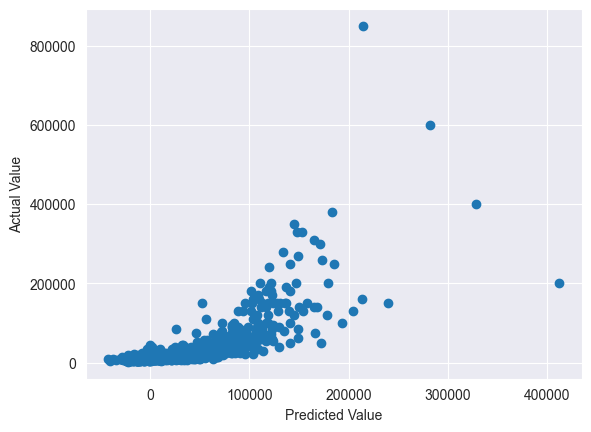

In [80]:
from matplotlib import pyplot as plt

# visualise the prediction
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()